#### California Housing Prices

The goal is to perform univariate linear regression on the California Housing Prices dataset, where we aim to predict the median house value based on three independent variables: median income, population, and number of households.

For accessing the dataset: [California Housing Prices](https://www.kaggle.com/datasets/camnugent/california-housing-prices/data)

#import libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

#importing the dataset using pandas

In [2]:
new = pd.read_csv('./housing.csv')

#to check the variables and the value
new.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Exploratory Data Analysis(EDA)

In [3]:
new.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [4]:
new['population'].describe()

count    20640.000000
mean      1425.476744
std       1132.462122
min          3.000000
25%        787.000000
50%       1166.000000
75%       1725.000000
max      35682.000000
Name: population, dtype: float64

The breakdown provides gives the overall counts (number of observation) approximately as 20640, with the average value of approximately 1425, where the values are spread around the mean is approxiamtely 1132. The smallest value in the dataset is 3, whereas the largest value is approximately 35682.

In [5]:
new['median_income'].describe()

count    20640.000000
mean         3.870671
std          1.899822
min          0.499900
25%          2.563400
50%          3.534800
75%          4.743250
max         15.000100
Name: median_income, dtype: float64

The breakdown provides gives the overall counts (number of observation) approximately as 20640, with the average value of approximately 3.8, where the values are spread around the mean is approxiamtely 1.9. The smallest value in the dataset is 0.5, whereas the largest value is approximately 15.

In [6]:
new['median_house_value'].describe()

count     20640.000000
mean     206855.816909
std      115395.615874
min       14999.000000
25%      119600.000000
50%      179700.000000
75%      264725.000000
max      500001.000000
Name: median_house_value, dtype: float64

The breakdown provides gives the overall counts (number of observation) approximately as 20640, with the average value of approximately 206855, where the values are spread around the mean is approxiamtely 115395. The smallest value in the dataset is 14999, whereas the largest value is approximately 500001.

[Text(0.5, 1.0, 'Median House Value vs Median Income')]

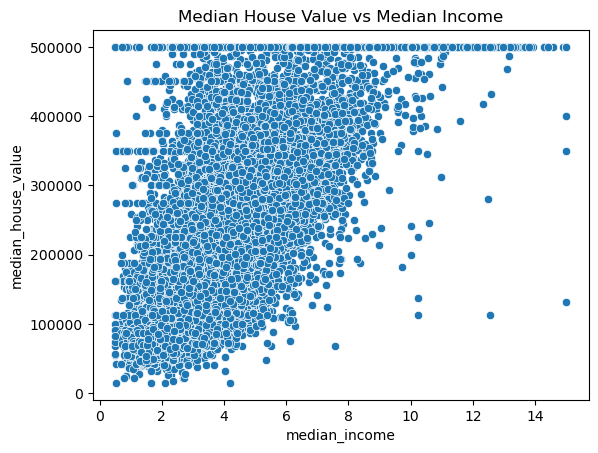

In [7]:
sns.scatterplot(x='median_income', y='median_house_value',data=new).set(title="Median House Value vs Median Income")

The scatterplot shows a clear trend of increasing median house values as median income increases. There are some outliers, where areas with lower income have higher median house value, possibly due to other factor such as locations.

[Text(0.5, 1.0, 'Median House Value vs Population')]

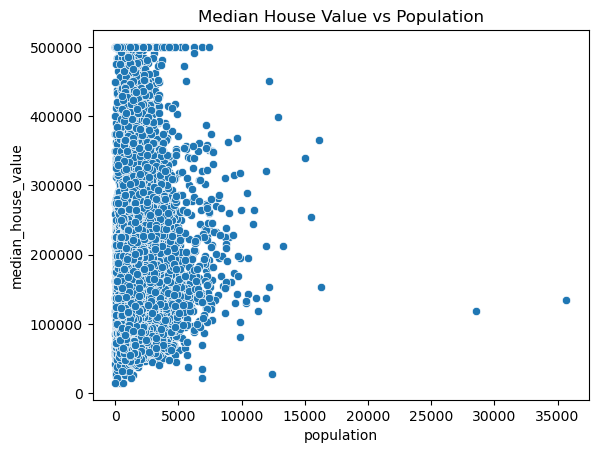

In [8]:
sns.scatterplot(x='population', y='median_house_value', data=new).set(title="Median House Value vs Population")

There is a weak relationship between median house value and population, which means that areas with higher population tend to have a lower median house values. The factor includes location or a limited housing supply for the weak relationship.  

[Text(0.5, 1.0, 'Median House Value vs Number_households')]

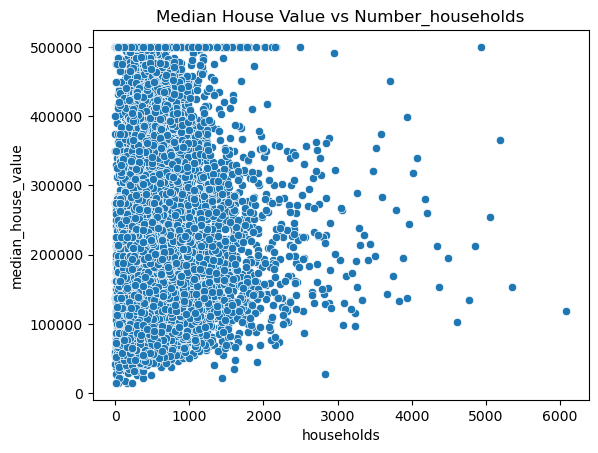

In [9]:
sns.scatterplot(x='households', y='median_house_value', data=new).set(title="Median House Value vs Number_households")

There is a positive relationship between median house value and Number of households. Areas with more number of households tend to have higher median house values.

In [10]:
summary_table = pd.DataFrame(columns=["Model", "Intercept", "Coefficient", "R2 Score", "Mean Absolute Error", "Mean Squared Error"])

coefficient of determination: 0.47344749180719903
intercept: 45085.57670326799
coefficients: [41793.8492019]
predicted response:
[393027.73007889 392033.03646789 348400.25790111 ... 116135.12034649
 123123.05193305 144914.36490692]
mean sqaured error: 7011311502.929527
mean absolute error: 62625.9337911434


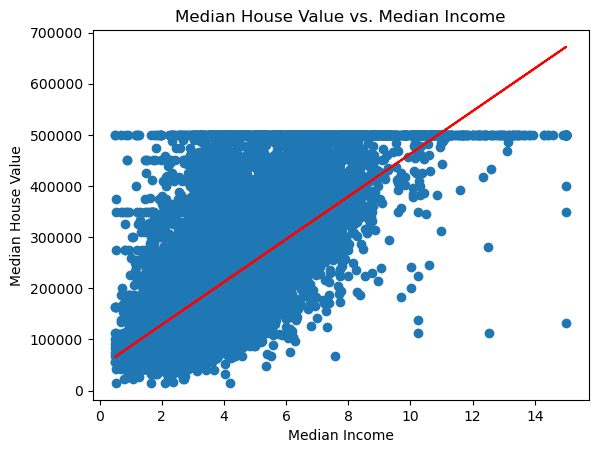

In [11]:
#linear regression model between median house value vs median income
X=new[['median_income']]
y=new['median_house_value']
model1=LinearRegression().fit(X,y)

#R-Squared
r_sq = model1.score(X, y)
print(f"coefficient of determination: {r_sq}")

#intercept
print(f"intercept: {model1.intercept_}")

#co-efficient
print(f"coefficients: {model1.coef_}")

#running the prediction in the model
y_pred1 = model1.predict(X)
print(f"predicted response:\n{y_pred1}")

#the mse and mae
mse_income = mean_squared_error(new['median_house_value'], y_pred1)
mae_income = mean_absolute_error(new['median_house_value'], y_pred1)

print(f"mean sqaured error: {mse_income}")
print(f"mean absolute error: {mae_income}")

#plotting the result 
# Median House Value vs. Population
plt.scatter(new['median_income'], new['median_house_value'])
plt.plot(new['median_income'], y_pred1, color='red')
plt.title('Median House Value vs. Median Income')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.show()

#summarize the results in table
summary_table.loc[len(summary_table.index)] = [
    "model1",
    model1.intercept_,
    model1.coef_,
    model1.score(X, y),
    mae_income,
    mse_income
]


The scatter plot shows points representing each data instance, with the x-axis representing the median income and the y-axis representing the median house value.
The red line results from the linear regression model, representing the best-fit line that minimizes the difference between the predicted median house values and the actual values.
This suggest their is a positive correlation between medina income and median house value
As median income increases, the median house value increases. As for the intercept might not give a meaningful insights as we can have a zero median income.

coefficient of determination: 0.0006076066693256887
intercept: 210436.2620762733
coefficients: [-2.51175277]
predicted response:
[209627.47768285 204405.54366442 209190.43270006 ... 207906.92703224
 208575.05327028 206952.46097788]
mean sqaured error: 13307412412.389355
mean absolute error: 91153.82009473181


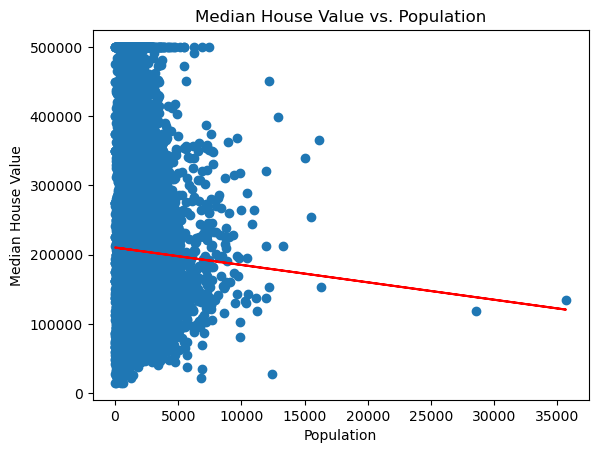

In [12]:
#linear regression model between median house value vs population
X=new[['population']]
y=new['median_house_value']
model2=LinearRegression().fit(X,y)

#R-Squared
r_sq = model2.score(X, y)
print(f"coefficient of determination: {r_sq}")

#intercept
print(f"intercept: {model2.intercept_}")

#co-efficient
print(f"coefficients: {model2.coef_}")

#running the prediction in the model
y_pred2 = model2.predict(X)
print(f"predicted response:\n{y_pred2}")

#the mse and mae
mse_population = mean_squared_error(new['median_house_value'], y_pred2)
mae_population = mean_absolute_error(new['median_house_value'], y_pred2)

print(f"mean sqaured error: {mse_population}")
print(f"mean absolute error: {mae_population}")

#plotting the result 
# Median House Value vs. Population
plt.scatter(new['population'], new['median_house_value'])
plt.plot(new['population'], y_pred2, color='red')
plt.title('Median House Value vs. Population')
plt.xlabel('Population')
plt.ylabel('Median House Value')
plt.show()

#summarize the results in table
summary_table.loc[len(summary_table.index)] = [
    "model2",
    model2.intercept_,
    model2.coef_,
    model2.score(X, y),
    mae_population,
    mse_population
]

There is a weak relationship between median house value and population, which means that areas with higher population tend to have a lower median house values. The model does not give an accurate value because of some extreme oultiers, which indeed suggests the decreasing(downwards) trend in the graph.

coefficient of determination: 0.0006076066693256887
intercept: 196928.57716233088
coefficients: [19.87277516]
predicted response:
[199432.54683194 219543.79528945 200446.05836488 ... 205533.48880472
 203864.17569165 207461.14799482]
mean sqaured error: 13257776904.728533
mean absolute error: 90802.74324318446


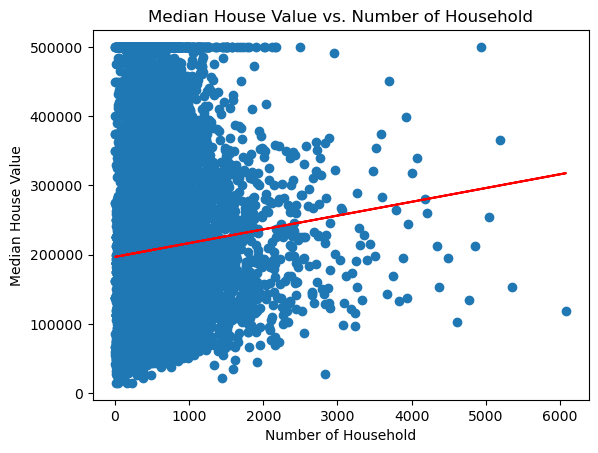

In [13]:
#linear regression model between median house value vs number of households
X=new[['households']]
y=new['median_house_value']
model3=LinearRegression().fit(X,y)

#R-Squared
quaredr_sq = model3.score(X, y)
print(f"coefficient of determination: {r_sq}")

#intercept
print(f"intercept: {model3.intercept_}")

#co-efficient
print(f"coefficients: {model3.coef_}")

#running the prediction in the model
y_pred3 = model3.predict(X)
print(f"predicted response:\n{y_pred3}")

#the mse and mae
mse_household = mean_squared_error(new['median_house_value'], y_pred3)
mae_household = mean_absolute_error(new['median_house_value'], y_pred3)

print(f"mean sqaured error: {mse_household}")
print(f"mean absolute error: {mae_household}")

#plotting the result 
# Median House Value vs. Population
plt.scatter(new['households'], new['median_house_value'])
plt.plot(new['households'], y_pred3, color='red')
plt.title('Median House Value vs. Number of Household')
plt.xlabel('Number of Household')
plt.ylabel('Median House Value')
plt.show()

#summarize the results in table
summary_table.loc[len(summary_table.index)] = [
    "model3",
    model3.intercept_,
    model3.coef_,
    model3.score(X, y),
    mae_household,
    mse_household
]

Positive slope indicates a positive correlation. As the number of households increases, median house value tends to increase.

In [14]:
#to compare the overall result for each individual models
summary_table.head()

,Model,Intercept,Coefficient,R2 Score,Mean Absolute Error,Mean Squared Error
0,model1,45085.576703,[41793.849201896264],0.473447,62625.933791,7.011312e+09
1,model2,210436.262076,[-2.5117527746150685],0.000608,91153.820095,1.330741e+10
2,model3,196928.577162,[19.872775155643843],0.004335,90802.743243,1.325778e+10


The above table explains the highest for an univariate comparison is 47% (i.e., for model1) which is very less.
In case of model 2 and model 3 the R-Sqaured values are not exsistent at 0.0006% and 0.004% repectively. Which indirectly suggest that some further tuning are needed in the dataset.


#### Conclusion

The above analyses provide a initial insights into how these independent variables are correlating with the median house value and the predicting results based on a simple linear regressions models, further exploartiond and adjustments are needed for better accuracy for predictions.